<a href="https://colab.research.google.com/github/hanjing06/Course-Selector/blob/main/squat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training our barbell detection model

**Author**: Hanjing Lin and Mats Leis


###Introduction:

This notebook uses Ultralytics to train the YOLO11 object detection model using our fixed dataset from the [RoboFlow Universe](https://universe.roboflow.com/techtitans-pcchf/barbell-detection-8phtm/dataset/12). At the end of this Colab, you can run our custom YOLO model that can run on your PC, phone, or edge device like a Raspberry Pi

### Working in Colab
Colab provides a virtual machine in your browser complete with a Linux OS, filesystem, Python environment, and best of all, a free GPU. We'll install PyTorch and Ultralytics in this environment and use it to train our model. Simply click the Play button on sections of code in this notebook to execute them on the virtual machine.

1. Verifying the GPU availability

Make sure you're using a GPU-equipped machine by going to "Runtime" -> "Change runtime type" in the top menu bar, and then selecting one of the GPU options (I'd recomment T4 GPU) in the Hardware accelerator section. Click Play on the following code block to verify that the NVIDIA GPU is present and ready for training.

<p align=center>
<img src="https://s3.us-west-1.amazonaws.com/evanjuras.com/img/yolo-model-demo.gif" height="360"><br>
<i>Custom YOLO candy detection model in action!</i>
</p>

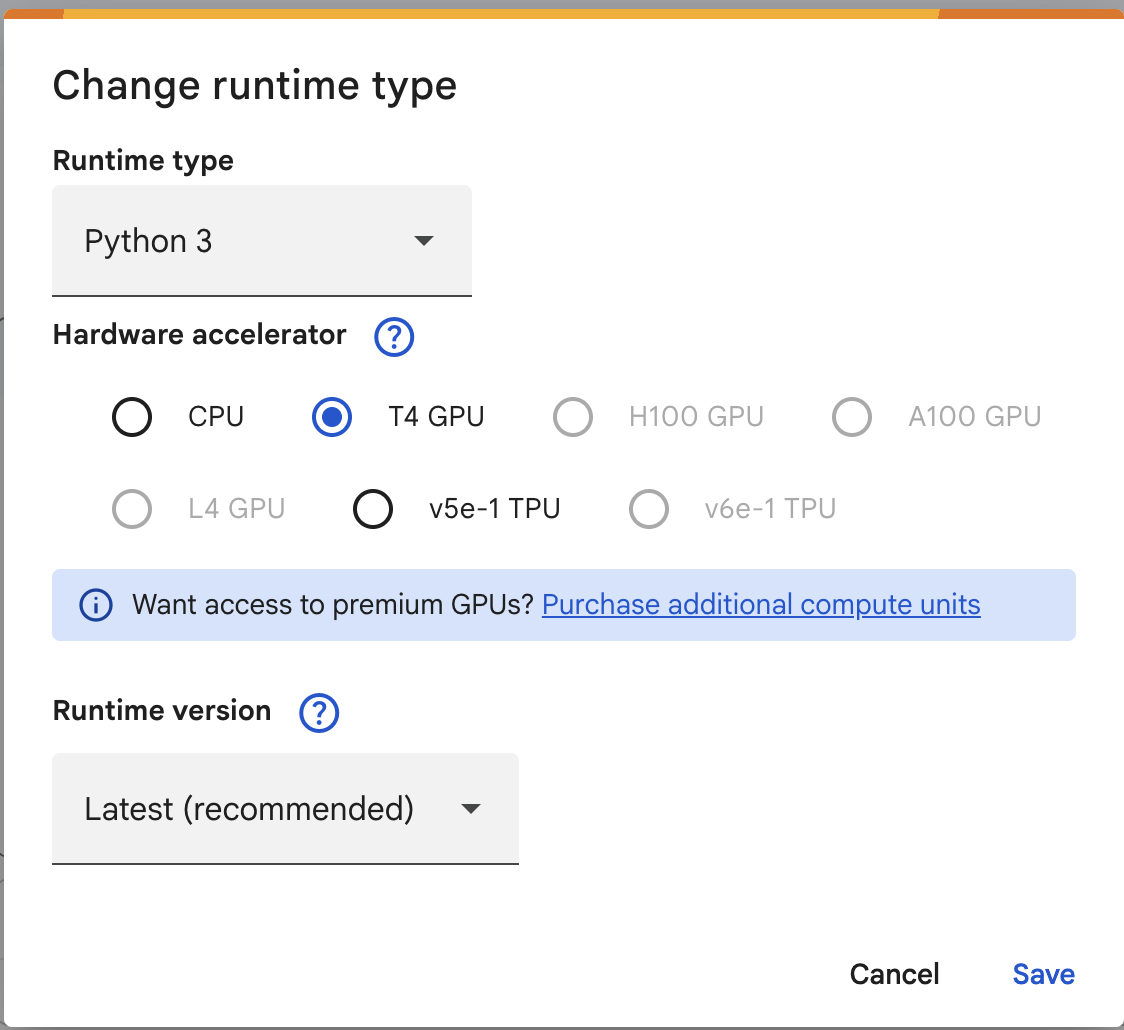

In [ ]:
!nvidia-smi

Fri Feb 13 07:32:12 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

python3: can't open file '/content/train_val_split.py': [Errno 2] No such file or directory


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.0 MB/s eta 0:00:00


In [ ]:
!unzip -q /content/Barbell\ Detection.v12i.yolov8.zip -d /content/custom_data

Train: actual images to train the model. in one epoch of training, every image in the train set is passed into the neural network. training alg adjusts the network weights to fit the data in the images
Validation: images used to check model's performance at the end of each training epoch.

*note that epoch stands for how logn the model trains for

>200, 60 epochs

*another note: you can change the model in the line below to adjust your training size/accuracy

In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots